In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [7]:
def convolve_im(im: np.array,
                kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    ##FUNCTION TO VIEW IMAGE WITH COMPLEX DATA
    def complex_imshow(fft_im):
        fft_abs = np.abs(fft_im)
        c = 255/(np.log(1+np.max(fft_abs)))
        f = c*np.log(1+fft_abs)
        plt.imshow(f, cmap="gray")
    ##GETTING IMAGE CENTER POSITION
    center_col = im.shape[1] // 2
    center_row = im.shape[0] // 2
    ##CREATING FILTER
    fft_filter = np.zeros(im.shape)
    ##GETTING SPATIAL FILTER SIZE
    HF, WF = kernel.shape
    ##PADDING FILTER
    fft_filter[center_col - int(HF/2): center_col + int(HF/2)+1, center_row - int(WF/2): center_col + int(WF/2)+1] =  kernel
    ##Filter Spatial to freq Domain
    fft_kernel = np.fft.fft2(fft_filter)
    ##Filter Shifting
    fft_kernel_shifted = np.fft.fftshift(fft_kernel)
    ##Image Spatial to freq Domain
    fft_image = np.fft.fft2(im)
    ##Image Shifted
    fft_image_shifted = np.fft.fftshift(fft_image)
    ##Image Conv with Filter in Freq Domain
    fft_conv = fft_kernel_shifted * fft_image_shifted
    #fft_conv_shifted =  np.fft.ifftshift(fft_conv)
    ##Conv Image Freq to Spatial Domain
    final_im =  np.fft.ifft2(fft_conv)
    ##Image Shift back
    final_im_shifted = np.fft.ifftshift(final_im)

    conv_result = final_im_shifted

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        # Visualize FFT
        plt.subplot(1, 5, 2)
        complex_imshow(fft_image_shifted)
        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        complex_imshow(fft_kernel_shifted)
        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        complex_imshow(fft_conv)
        # Visualize filtered spatial image
        plt.subplot(1, 5, 5)
        complex_imshow(conv_result)

    ### END YOUR CODE HERE ###
    return conv_result

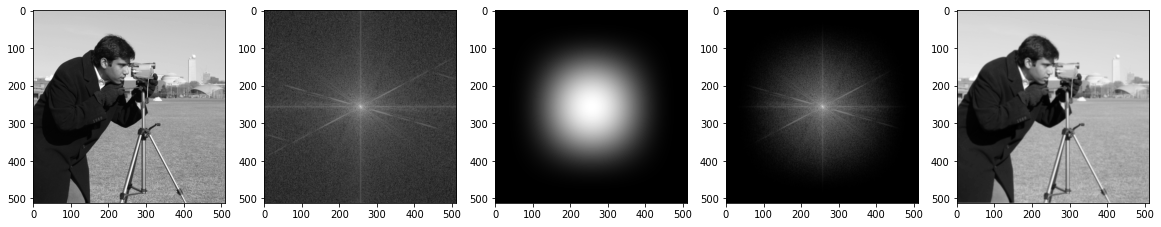

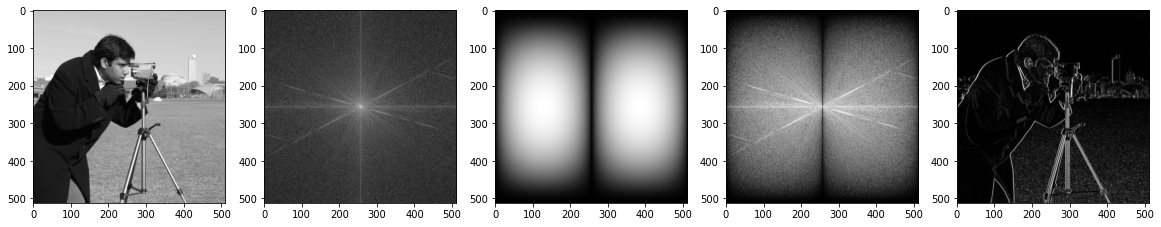

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


/home/turin/Documents/GitHub/TDT4195_IP/assignment 2/utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")
/home/turin/Documents/GitHub/TDT4195_IP/assignment 2/utils.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  im = (im*255).astype(np.uint8)


In [8]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    if verbose:
        plt.show()

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)